In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Data Wrangling

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# print total number of columns
len(df.columns)

21

In [5]:
# summary of numeric columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
# check if there are any missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# check the number of unique values of each column
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [8]:
# check the number of customers who have and have not churned
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
# remove all redundant extra whitespaces
for x in df.columns:
    if df[x].dtype == object:
        df[x] = df[x].str.strip()

In [11]:
# df['TotalCharges'] = df['TotalCharges'].astype(float)
df = df[df['TotalCharges'] != ' ']
len(df[df['TotalCharges'] == ' '])

0

In [12]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

# Data Exploration

In [13]:
churn_df = df.copy()
churn_df.drop(['customerID', 'MonthlyCharges', 'tenure', 'TotalCharges'], axis=1, inplace=True)

In [14]:
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [15]:
len(churn_df.columns)

17

In [16]:
# summary of new dataset using crosstab
summary = pd.concat([pd.crosstab(churn_df[x], churn_df['Churn']) for x in churn_df.columns[0:15]], keys=churn_df.columns[0:15])
summary

Churn                                   No   Yes
gender           Female               2549   939
                 Male                 2625   930
SeniorCitizen    0                    4508  1393
                 1                     666   476
Partner          No                   2441  1200
                 Yes                  2733   669
Dependents       No                   3390  1543
                 Yes                  1784   326
PhoneService     No                    512   170
                 Yes                  4662  1699
MultipleLines    No                   2541   849
                 No phone service      512   170
                 Yes                  2121   850
InternetService  DSL                  1962   459
                 Fiber optic          1799  1297
                 No                   1413   113
OnlineSecurity   No                   2037  1461
                 No internet service  1413   113
                 Yes                  1724   295
OnlineBackup     No                   1855  1233
                 No internet service  1413   113
                 Yes                  1906   523
DeviceProtection No                   1884  1211
                 No internet service  1413   113
                 Yes                  1877   545
TechSupport      No                   2027  1446
                 No internet service  1413   113
                 Yes                  1734   310
StreamingTV      No                   1868   942
                 No internet service  1413   113
                 Yes                  1893   814
StreamingMovies  No                   1847   938
                 No internet service  1413   113
                 Yes                  1914   818
Contract         Month-to-month       2220  1655
                 One year             1307   166
                 Two year             1647    48
PaperlessBilling No                   2403   469
                 Yes                  2771  1400

In [17]:
# churn percentage for the summary
summary['ChurnPercentage'] = ((summary['Yes']*100)/(summary['Yes']+summary['No'])).round(2)
summary

Churn                                   No   Yes  ChurnPercentage
gender           Female               2549   939            26.92
                 Male                 2625   930            26.16
SeniorCitizen    0                    4508  1393            23.61
                 1                     666   476            41.68
Partner          No                   2441  1200            32.96
                 Yes                  2733   669            19.66
Dependents       No                   3390  1543            31.28
                 Yes                  1784   326            15.45
PhoneService     No                    512   170            24.93
                 Yes                  4662  1699            26.71
MultipleLines    No                   2541   849            25.04
                 No phone service      512   170            24.93
                 Yes                  2121   850            28.61
InternetService  DSL                  1962   459            18.96
                 Fiber optic          1799  1297            41.89
                 No                   1413   113             7.40
OnlineSecurity   No                   2037  1461            41.77
                 No internet service  1413   113             7.40
                 Yes                  1724   295            14.61
OnlineBackup     No                   1855  1233            39.93
                 No internet service  1413   113             7.40
                 Yes                  1906   523            21.53
DeviceProtection No                   1884  1211            39.13
                 No internet service  1413   113             7.40
                 Yes                  1877   545            22.50
TechSupport      No                   2027  1446            41.64
                 No internet service  1413   113             7.40
                 Yes                  1734   310            15.17
StreamingTV      No                   1868   942            33.52
                 No internet service  1413   113             7.40
                 Yes                  1893   814            30.07
StreamingMovies  No                   1847   938            33.68
                 No internet service  1413   113             7.40
                 Yes                  1914   818            29.94
Contract         Month-to-month       2220  1655            42.71
                 One year             1307   166            11.27
                 Two year             1647    48             2.83
PaperlessBilling No                   2403   469            16.33
                 Yes                  2771  1400            33.57

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from pylab import rcParams

([<matplotlib.patches.Wedge at 0x7fa88bf0dd60>,
 [Text(-1.098717906522491, 0.05309389688876497, 'No'),
  Text(1.0987179015514767, -0.053093999758158844, 'Yes')],
 [Text(-0.5993006762849951, 0.0289603073938718, '73.46%'),
  Text(0.5993006735735328, -0.028960363504450276, '26.54%')])

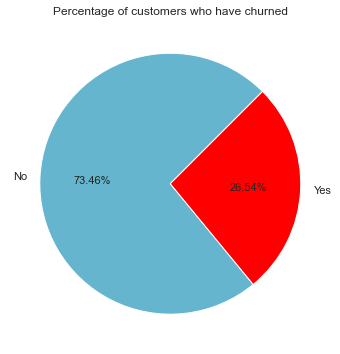

In [19]:
# pie chart to show what percent of customers have churned
plt.figure(figsize=(10,6))
plt.title('Percentage of customers who have churned')
plt.pie(churn_df['Churn'].value_counts(), labels=churn_df['Churn'].value_counts().index, colors = ('c', 'red'), startangle = 45, autopct = "%1.2f%%", textprops={'fontsize': 11})

Text(0.5, 0.98, 'How Monthly Charges affect Churn')

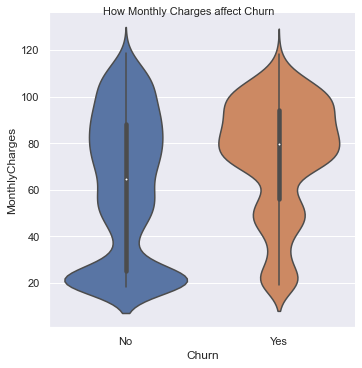

In [20]:
# violin plot to show how monthly charges affect churn
plotA = sns.catplot(x=df['Churn'], y = df['MonthlyCharges'],data = churn_df, kind="violin")
plotA.fig.suptitle('How Monthly Charges affect Churn',fontsize=11)

Text(0.5, 0.98, 'How Tenure affect Churn')

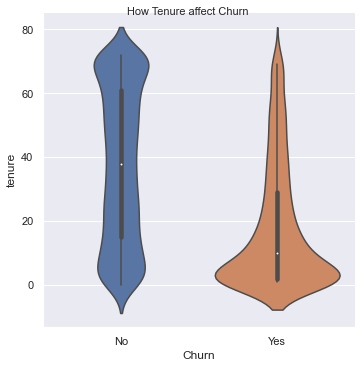

In [21]:
# violin plot to show how tenure affect churn
plotB = sns.catplot(x=df['Churn'], y = df['tenure'],data = churn_df, kind="violin")
plotB.fig.suptitle('How Tenure affect Churn',fontsize=11)

# Predictive Modelling

In [22]:
# drop the id column to avoid overfitting
df = df.drop('customerID', axis=1)

In [23]:
target_column = df['Churn']

# create dataframes of the specific column types
categorical_columns = df[['gender', 'SeniorCitizen','Partner', 'Dependents','PhoneService','MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod']]
numeric_columns = df[['tenure', 'MonthlyCharges', 'TotalCharges']]

multivalue_columns = pd.DataFrame()
for x in df.columns:
    if x != 'Churn' and df[x].value_counts().nunique() > 2 and x not in numeric_columns.columns:
        multivalue_columns = pd.concat([multivalue_columns, df[x]], axis=1)
        
binary_columns = pd.DataFrame()
for x in df.columns:
    if df[x].value_counts().nunique() == 2:
        binary_columns = pd.concat([binary_columns, df[x]], axis=1)
       
    
# put the name of the columns of each dataframe into a list   
categorical_columns = categorical_columns.columns.tolist()
numeric_columns = numeric_columns.columns.tolist()
binary_columns = binary_columns.columns.tolist()
multivalue_columns = multivalue_columns.columns.tolist()

In [24]:
numeric_columns

['tenure', 'MonthlyCharges', 'TotalCharges']

In [25]:
categorical_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [26]:
numeric_columns

['tenure', 'MonthlyCharges', 'TotalCharges']

In [27]:
binary_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [28]:
multivalue_columns

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in binary_columns :
    df[i] = le.fit_transform(df[i])
    
# one hot encoding of categorical data
df = pd.get_dummies(data = df, columns = multivalue_columns)

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# scale numeric columns
scaled_data = sc.fit_transform(df[numeric_columns])
scaled_data = pd.DataFrame(scaled_data,columns=numeric_columns)

In [31]:
# make a copy of the dataframe 
df2= df.copy()

# drop the original numeric columns
df.drop(columns=numeric_columns, axis=1, inplace=True)

# merge the scaled numeric columns using index
df.merge(scaled_data, left_index=True, right_index=True, how='left')

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,-1.277445,-1.160323,-0.994194
1,1,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0.066327,-0.259629,-0.173740
2,1,0,0,0,1,1,1,1,0,0,...,1,0,0,0,0,0,1,-1.236724,-0.362660,-0.959649
3,1,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0.514251,-0.746535,-0.195248
4,0,0,0,0,1,1,1,1,0,0,...,1,0,0,0,0,1,0,-1.236724,0.197365,-0.940457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,1,0,0,0,1,...,0,1,0,0,0,0,1,-0.340876,0.665992,-0.129180
7039,0,0,1,1,1,1,0,0,0,1,...,0,1,0,0,1,0,0,1.613701,1.277533,2.241056
7040,0,0,1,1,0,1,0,0,1,0,...,1,0,0,0,0,1,0,-0.870241,-1.168632,-0.854514
7041,1,1,1,0,1,1,1,0,0,1,...,1,0,0,0,0,0,1,-1.155283,0.320338,-0.872095


In [32]:
from sklearn.model_selection import train_test_split

# remove target column
X = df.drop(['Churn'], axis=1).values

# target column
y= df['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [33]:
df_train = pd.DataFrame(X_train)

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

## Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

lgr_model = LogisticRegression()
lgr_model.fit(X_train, y_train)


y_pred = lgr_model.predict(X_test)
score = lgr_model.score(X_test, y_test)

print(f"Accuracy: {(score*100).round(2)}%")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 78.7%
[[1374  170]
 [ 280  289]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1544
           1       0.63      0.51      0.56       569

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



### Feature importance

In [36]:
coef = lgr_model.coef_[0]
coef = [abs(number) for number in coef]
print(coef)

[0.03262724875471802, 0.10474046449288192, 0.21200545505586704, 0.13134914463454908, 0.09133798897317184, 0.29138889145325686, 0.04119929878540138, 0.0915394558925442, 0.05013869018770705, 0.31892927927166215, 0.39194499676696903, 0.07281425057587236, 0.26522784109596215, 0.07281425057587236, 0.19221212360071174, 0.18822809746073538, 0.07281425057589198, 0.11521237996541403, 0.08964522693847708, 0.07281425057587236, 0.01662950944316673, 0.25801458795413357, 0.07281425057587236, 0.18499887045878163, 0.012526716117324026, 0.07281425057587236, 0.08554243361255051, 0.058402368841272645, 0.07281425057587236, 0.1314180863365521, 1.1618689056932967, 0.06513828724898954, 1.0965291515249977, 0.2367127455640242, 0.19023083639119173, 0.4119719981216716, 0.01517305075291793]


In [37]:
# Finding and deleting the label column
cols = list(df.columns)
cols.index('Churn')

6

In [38]:
del cols[6]

In [39]:
# Sorting on Feature Importance
sorted_index = sorted(range(len(coef)), key = lambda k: coef[k], reverse = True)
for idx in sorted_index:
    print(cols[idx])

Contract_Month-to-month
Contract_Two year
PaymentMethod_Electronic check
InternetService_Fiber optic
InternetService_DSL
PaperlessBilling
OnlineSecurity_No
TechSupport_No
PaymentMethod_Bank transfer (automatic)
Partner
OnlineSecurity_Yes
PaymentMethod_Credit card (automatic)
OnlineBackup_No
TechSupport_Yes
StreamingMovies_Yes
Dependents
OnlineBackup_Yes
SeniorCitizen
MultipleLines_No phone service
PhoneService
DeviceProtection_No
StreamingTV_Yes
OnlineBackup_No internet service
InternetService_No
OnlineSecurity_No internet service
DeviceProtection_No internet service
TechSupport_No internet service
StreamingTV_No internet service
StreamingMovies_No internet service
Contract_One year
StreamingMovies_No
MultipleLines_Yes
MultipleLines_No
gender
DeviceProtection_Yes
PaymentMethod_Mailed check
StreamingTV_No


## Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)


y_pred = rfc_model.predict(X_test)
score = rfc_model.score(X_test, y_test)


print(f"Accuracy: {(score*100).round(2)}%")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 74.96%
[[1325  219]
 [ 310  259]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1544
           1       0.54      0.46      0.49       569

    accuracy                           0.75      2113
   macro avg       0.68      0.66      0.66      2113
weighted avg       0.74      0.75      0.74      2113



### Feature importance

In [41]:
cols = df.columns

In [42]:
cols

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'Churn', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_E

In [43]:
feature_importances = pd.DataFrame(rfc_model.feature_importances_,
                                   index = pd.DataFrame(X_train).columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances

,importance
30,0.077071
0,0.073779
2,0.061029
5,0.057079
35,0.052262
1,0.050238
21,0.048280
3,0.047561
12,0.042855
32,0.031908


In [44]:
cols = pd.DataFrame(cols, columns=['Features'])

In [45]:
feature_importances = pd.concat([feature_importances,cols], axis=1)

In [46]:
feature_importances = feature_importances.sort_values('importance', ascending=False)
feature_importances

,importance,Features
30,0.077071,StreamingMovies_Yes
0,0.073779,gender
2,0.061029,Partner
5,0.057079,PaperlessBilling
35,0.052262,PaymentMethod_Credit card (automatic)
1,0.050238,SeniorCitizen
21,0.048280,DeviceProtection_Yes
3,0.047561,Dependents
12,0.042855,InternetService_No
32,0.031908,Contract_One year


#### Save model

In [47]:
import pickle

# save
with open('model.pkl','wb') as f:
    pickle.dump(rfc_model, f)

# load
with open('model.pkl', 'rb') as f:
    loaded_rfc_model = pickle.load(f)

In [48]:
predictions = loaded_rfc_model.predict(X_test)

# Deep Learning

In [49]:
import tensorflow as tf

In [50]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [51]:
dl_model = Sequential()

dl_model.add(Dense(20, kernel_initializer = "uniform",activation = "relu", input_dim=37))
dl_model.add(Dense(1, kernel_initializer = "uniform",activation = "sigmoid"))

dl_model.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [52]:
dl_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                760       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 781
Trainable params: 781
Non-trainable params: 0
_________________________________________________________________


In [53]:
X_train.shape

(4930, 37)

In [54]:
batch_size = 64
epochs = 25

history = dl_model.fit(X_train,y_train,batch_size = batch_size,epochs = epochs,verbose = 1,validation_data = (X_test, y_test))

score = dl_model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
78/78 [==============================] - 1s 3ms/step - loss: 0.6329 - accuracy: 0.7225 - val_loss: 0.5587 - val_accuracy: 0.7307
Epoch 2/25
78/78 [==============================] - 0s 2ms/step - loss: 0.5101 - accuracy: 0.7373 - val_loss: 0.4739 - val_accuracy: 0.7586
Epoch 3/25
78/78 [==============================] - 0s 2ms/step - loss: 0.4577 - accuracy: 0.7775 - val_loss: 0.4470 - val_accuracy: 0.7842
Epoch 4/25
78/78 [==============================] - 0s 2ms/step - loss: 0.4448 - accuracy: 0.7878 - val_loss: 0.4407 - val_accuracy: 0.7870
Epoch 5/25
78/78 [==============================] - 0s 2ms/step - loss: 0.4405 - accuracy: 0.7892 - val_loss: 0.4383 - val_accuracy: 0.7889
Epoch 6/25
78/78 [==============================] - 0s 1ms/step - loss: 0.4384 - accuracy: 0.7862 - val_loss: 0.4367 - val_accuracy: 0.7903
Epoch 7/25
78/78 [==============================] - 0s 2ms/step - loss: 0.4372 - accuracy: 0.7864 - val_loss: 0.4358 - val_accuracy: 0.7894
Epoch 8/25
78/78 [==

In [55]:
y_pred = dl_model.predict(X_test)
y_pred = (y_pred > 0.5)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1358  186]
 [ 258  311]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1544
           1       0.63      0.55      0.58       569

    accuracy                           0.79      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.78      0.79      0.79      2113



In [56]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

In [57]:
dl_model2 = Sequential()

# Hidden Layer 1
dl_model2.add(Dense(2000, activation='relu', input_dim=37, kernel_regularizer=l2(0.01)))
dl_model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 1
dl_model2.add(Dense(1000, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
dl_model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 2
dl_model2.add(Dense(500, activation = 'relu', kernel_regularizer=l2(0.01)))
dl_model2.add(Dropout(0.3, noise_shape=None, seed=None))

dl_model2.add(Dense(1, activation='sigmoid'))

dl_model2.summary()

# create checkpoint so that model is saved after each epoch
checkpoint = ModelCheckpoint("deep_model_checkpoint.h5",monitor="val_loss",mode="min",save_best_only = True,verbose=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2000)              76000     
_________________________________________________________________
dropout (Dropout)            (None, 2000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              2001000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)               500500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [58]:
dl_model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [59]:
from tensorflow.keras.callbacks import EarlyStopping 

earlystop = EarlyStopping(monitor = 'val_loss', min_delta = 0,patience = 2, verbose = 1,restore_best_weights = True)

# put callbacks into a callback list
callbacks = [earlystop, checkpoint]

In [60]:
batch_size = 32
epochs = 10

history = dl_model2.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    # NOTE We are adding our callbacks here
                    callbacks = callbacks,
                    validation_data = (X_test, y_test))

score = dl_model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
155/155 [==============================] - 7s 42ms/step - loss: 2.7141 - accuracy: 0.7682 - val_loss: 0.4997 - val_accuracy: 0.7832

Epoch 00001: val_loss improved from inf to 0.49966, saving model to deep_model_checkpoint.h5
Epoch 2/10
155/155 [==============================] - 6s 40ms/step - loss: 0.4988 - accuracy: 0.7748 - val_loss: 0.4834 - val_accuracy: 0.7956

Epoch 00002: val_loss improved from 0.49966 to 0.48338, saving model to deep_model_checkpoint.h5
Epoch 3/10
155/155 [==============================] - 6s 36ms/step - loss: 0.4909 - accuracy: 0.7801 - val_loss: 0.4844 - val_accuracy: 0.7856

Epoch 00003: val_loss did not improve from 0.48338
Epoch 4/10
155/155 [==============================] - 7s 42ms/step - loss: 0.4903 - accuracy: 0.7803 - val_loss: 0.4780 - val_accuracy: 0.7927

Epoch 00004: val_loss improved from 0.48338 to 0.47798, saving model to deep_model_checkpoint.h5
Epoch 5/10
155/155 [==============================] - 6s 37ms/step - loss: 0.4906 - ac